#Object Detection Using Adaptive Mask RCNN in Optical Remote Sensing Images

## Step 1 : Bussiness Understanding

This project was presented in the context of a deep learning project for the 4th year international Data Science learning program.

The students were provided with a document **Object Detection Using Adaptive Mask RCNN** that explores the use of deep learning algorithms for object detection in remote sensing images. It discusses the challenges faced in this field and how deep learning can overcome them.
The study introduces a novel training strategy and evaluates different optimization techniques. The results show promise, especially in detecting small objects. Various experiments and methods are detailed, emphasizing the significance of object detection in remote sensing applications.

Methods used in the object detection process over the years:
The document discusses several methods used in the context of object detection in remote sensing images:

1.**Optimization Techniques**: The study evaluates six optimization methods, including Adam, Adadelta, RMSprop, and SGD, as well as hybrid techniques like Adam-SGD and SGD_Adam. These methods are compared in terms of Intersection over Union (IOU) and recall rates under different thresholds. The results indicate that adaptive optimization methods like Adam perform well initially but may generalize poorly.

2.**Feature Extraction and Classification**: The document mentions two main stages in the process. The first stage involves feature extraction using methods like histogram of oriented gradients (HOG), Bag of Words (BOW), and Human activity recognition (Har). The second stage focuses on training a classifier using these features, with commonly used classifiers like support vector machine, Ada-boost, and artificial neural network.

3.**Hybrid Training Strategy**: A hybrid training strategy is introduced, starting with an adaptive method (Adam) and then switching to SGD. The study conducts experiments to determine the optimal conditions for switching between Adam and SGD, such as the number of epochs and learning rate values.

4.**Comparison with Baseline Techniques**: The performance of the proposed method is compared against deep learning baseline object detection techniques like Faster-Region-based Convolutional Network (FRCN), You Only Look Once (YOLO1 and YOLO2), Single Shot Multibox Detector (SSD), and Region-based Fully Convolutional Network (R-FCN) in terms of average precision, computation time, IOU, and Precision-Recall Curves (PRC).
These methods collectively aim to improve object detection accuracy in remote sensing images and address challenges such as complex backgrounds and varying object sizes.

### Dataset
The dataset mentioned in the document is the **NWPU VHR-10** dataset, which is designed for object detection in remote sensing images.
 Here are some key points about the dataset:

* <u>Origin</u>: The NWPU VHR-10 dataset was cropped from Google Earth and manually annotated by experts. It contains images of various classes of objects, including "airplane, ship, storage tank, baseball diamond, tennis court, basketball court, ground track field, harbor, bridge, and vehicle."

* <u>Classes</u>: The dataset consists of ten classes of objects, each representing a different category such as airplanes, ships, storage tanks, and sports fields.

* <u>Training and Testing</u>: The dataset is divided into a training set (70%) and a testing set (30%) for model evaluation. The training set is used to train the object detection model, while the testing set is used to assess the model's performance.

* <u>Object Distribution</u>: The dataset is not evenly distributed in terms of the number of images or objects across the ten classes. Some classes may have more instances than others, which can impact the model's ability to detect objects accurately.

* <u>Evaluation Metrics</u>: The dataset is used to evaluate the performance of the proposed object detection method using metrics such as Average Precision (AP) and Precision-Recall Curves (PRC). These metrics help assess the model's accuracy and effectiveness in detecting objects in remote sensing images.

What is expected of us is to use the dataset supplied to acquire the same findings as are shown in the paper.

# Step 2: Data understanding #


The data provided is a folder having 3 different folders:
+ Ground truth model: Containing .TXT files that have each a set of data containing xmin,xmax,ymin and ymax along with the class that varies from 1 to 10.
+ Positive dataset : contains a list of photos that do have some object classes.
+ Negative dataset : contains a list of photos that do not contain any mentioned object class.

In [ ]:
from numba import cuda
device = cuda.get_current_device()
device.reset()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import zipfile

# Provide the path to your zip file in Google Drive
zip_file_path = '/content/positive image set'

# Specify the directory where you want to extract the contents
extracted_dir_path = '/content/extracted/'

# Extract the zip file
#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#    zip_ref.extractall(extracted_dir_path)

Set the environment for object detection

In [ ]:
!pip install pycocotools --quiet
!git clone https://github.com/pytorch/vision.git
!git checkout v0.3.0

!cp vision/references/detection/utils.py ./
!cp vision/references/detection/transforms.py ./
!cp vision/references/detection/coco_eval.py ./
!cp vision/references/detection/engine.py ./
!cp vision/references/detection/coco_utils.py ./

Cloning into 'vision'...
remote: Enumerating objects: 502456, done.
remote: Counting objects: 100% (16066/16066), done.
remote: Compressing objects: 100% (806/806), done.
remote: Total 502456 (delta 15274), reused 16002 (delta 15233), pack-reused 486390
Receiving objects: 100% (502456/502456), 976.88 MiB | 36.63 MiB/s, done.
Resolving deltas: 100% (468518/468518), done.
fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Step 3: Data preparation
Import Librairies and modules necessary for object detection

In [3]:
import os
import random
from collections import defaultdict
import numpy as np
import pandas as pd
# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')
import cv2
from torch.utils import data
import os
import xml.etree.ElementTree as ET
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torch
import torchvision
from torchvision import transforms as torchtrans
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
import torch.utils.data
#from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from transformers import SamModel, SamProcessor
import albumentations as A
from collections import namedtuple
from albumentations.pytorch.transforms import ToTensorV2
from engine import train_one_epoch, evaluate
import utils
import transforms as T


# Load dataset #

In [4]:
#xml_folder="C:\\Users\\gladi\\OneDrive\\Desktop\\DL-Project\\xml_folder"
image_folder="/content/positive image set"
df_path='annotation_data - Copy.csv'
df = pd.read_csv(df_path)
df.head()

,imageid,width,height,xmin,ymin,xmax,ymax,classid
0,1,958,808,563,478,630,573,1
1,2,950,806,575,114,635,162,1
2,2,950,806,72,305,133,369,1
3,2,950,806,210,317,273,384,1
4,2,950,806,306,374,344,420,1


Consolidating Bounding Box Coordinates in DataFrame:
Transform bounding box coordinates from separate columns (xmin, ymin, xmax, ymax) into a single column (bbox):

In [5]:
df['bbox'] = df.apply(lambda row: [row['xmin'], row['ymin'], row['xmax'], row['ymax']], axis=1)
df.drop(['xmin', 'ymin', 'xmax', 'ymax'], axis=1, inplace=True)

In [6]:
df.head()

,imageid,width,height,classid,bbox
0,1,958,808,1,"[563, 478, 630, 573]"
1,2,950,806,1,"[575, 114, 635, 162]"
2,2,950,806,1,"[72, 305, 133, 369]"
3,2,950,806,1,"[210, 317, 273, 384]"
4,2,950,806,1,"[306, 374, 344, 420]"


 Resize images and adjust the corresponding bounding boxes to fit a target shape.

In [7]:
from PIL import Image
import pandas as pd
import numpy as np
import os

images_folder = "/content/positive image set"

# Step 1: Determine the target shape
target_width = 350
target_height = 350

# Step 2: Calculate scaling factors
df['width_scale'] = target_width / df['width']
df['height_scale'] = target_height / df['height']

# Function to add leading zeros to image IDs
def add_leading_zeros(image_id):
    if len(image_id) == 1:
        return "00" + image_id
    elif len(image_id) == 2:
        return "0" + image_id
    else:
        return image_id

# Step 3: Resize images and adjust bounding boxes
def resize_image_and_bbox(row):
    img_id = add_leading_zeros(str(row['imageid']))
    img_path = os.path.join(images_folder, f"{img_id}.jpg")
    img = Image.open(img_path)
    bbox = row['bbox']
    # Resize image
    img_resized = img.resize((target_width, target_height))
    # Adjust bounding box coordinates
    bbox_resized = [int(coord * scale) for coord, scale in zip(bbox, [row['width_scale'], row['height_scale'], row['width_scale'], row['height_scale']])]
    return img_resized, bbox_resized

_, df['resized_bbox'] = zip(*df.apply(resize_image_and_bbox, axis=1))

In [ ]:
df.head()

,imageid,width,height,classid,bbox,width_scale,height_scale,resized_bbox
0,1,958,808,1,"[563, 478, 630, 573]",0.365344,0.433168,"[205, 207, 230, 248]"
1,2,950,806,1,"[575, 114, 635, 162]",0.368421,0.434243,"[211, 49, 233, 70]"
2,2,950,806,1,"[72, 305, 133, 369]",0.368421,0.434243,"[26, 132, 49, 160]"
3,2,950,806,1,"[210, 317, 273, 384]",0.368421,0.434243,"[77, 137, 100, 166]"
4,2,950,806,1,"[306, 374, 344, 420]",0.368421,0.434243,"[112, 162, 126, 182]"


Grouping and Aggregating Object Detection Data by Image ID

In [8]:
grouped_df = df.groupby('imageid').agg({
    'width': 'first',
    'height': 'first',
    'classid': lambda x: x.tolist(),  # Convert classid to list
    'bbox': 'first',
    'width_scale': 'first',
    'height_scale': 'first',
    'resized_bbox': lambda x: x.tolist()  # Convert resized_bbox to list
}).reset_index()

grouped_df.head()

,imageid,width,height,classid,bbox,width_scale,height_scale,resized_bbox
0,1,958,808,[1],"[563, 478, 630, 573]",0.365344,0.433168,"[[205, 207, 230, 248]]"
1,2,950,806,"[1, 1, 1, 1, 1, 1, 1]","[575, 114, 635, 162]",0.368421,0.434243,"[[211, 49, 233, 70], [26, 132, 49, 160], [77, ..."
2,3,889,803,[1],"[100, 256, 170, 319]",0.393701,0.435866,"[[39, 111, 66, 139]]"


Load images from the dataset

array([[[ 78,  88,  49],
        [ 80,  90,  52],
        [ 79,  91,  55],
        ...,
        [ 91, 106,  73],
        [ 95, 108,  78],
        [ 95, 108,  80]],

       [[ 76,  86,  49],
        [ 80,  90,  53],
        [ 81,  93,  57],
        ...,
        [ 92, 105,  73],
        [ 93, 106,  76],
        [ 91, 103,  75]],

       [[ 77,  87,  51],
        [ 80,  90,  54],
        [ 80,  91,  56],
        ...,
        [ 93, 104,  72],
        [ 87,  98,  68],
        [101, 111,  83]],

       ...,

       [[112, 125, 117],
        [110, 124, 112],
        [111, 125, 110],
        ...,
        [ 84,  91,  58],
        [ 84,  90,  57],
        [ 84,  89,  57]],

       [[112, 125, 117],
        [113, 126, 115],
        [113, 127, 112],
        ...,
        [ 84,  92,  59],
        [ 85,  91,  58],
        [ 85,  90,  58]],

       [[113, 126, 118],
        [113, 127, 115],
        [110, 124, 110],
        ...,
        [ 86,  93,  60],
        [ 88,  94,  61],
        [ 85,  90,  58]]], dtype=uint8)
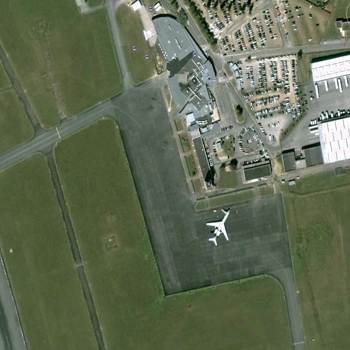

In [9]:
image_path = '/content/positive image set/001.jpg'
image_id = os.path.basename(image_path).rstrip('.jpg')
image = Image.open(image_path)
resized_image = image.resize((350, 350))
resized_array = np.array(resized_image).astype(np.uint8)
resized_array

### Generate Segmentation with Bounding Box ###


In [10]:
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

def show_boxes_on_image(raw_image, boxes):
    plt.figure(figsize=(10,10))
    plt.imshow(raw_image)
    for box in boxes:
      show_box(box, plt.gca())
    plt.axis('on')
    plt.show()

Set the SAM model up to transform bounding boxes into masks in order to get ready for the Adaptive Mask RCNN.

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SamModel.from_pretrained("facebook/sam-vit-huge").to(device)
processor = SamProcessor.from_pretrained("facebook/sam-vit-huge")

In [12]:
input_boxes = [grouped_df["resized_bbox"][0]]
input_boxes

[[[205, 207, 230, 248]]]

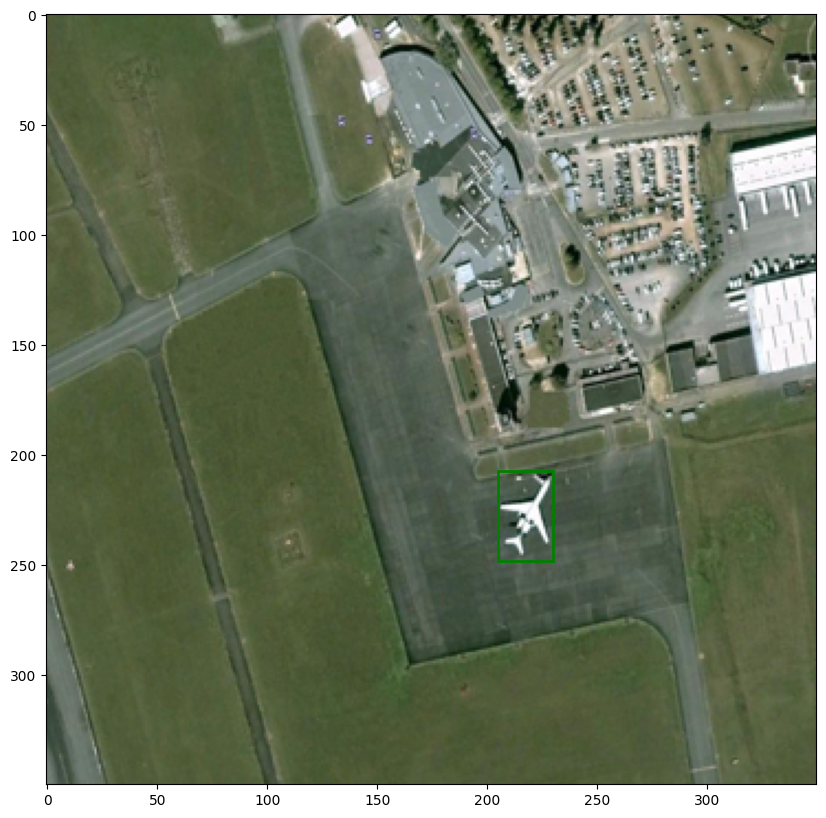

In [13]:
show_boxes_on_image(resized_array, input_boxes[0])

In [14]:
inputs = processor(resized_array, input_boxes=input_boxes, return_tensors="pt").to(device)
inputs["input_boxes"].shape
image_embeddings = model.get_image_embeddings(inputs["pixel_values"])

Employ the SAM model for inference, and use the input images and image embeddings to post-process the predicted masks.


In [15]:
inputs.pop("pixel_values", None)
inputs.update({"image_embeddings": image_embeddings})

with torch.no_grad():
    outputs = model(**inputs, multimask_output=False)

masks = processor.image_processor.post_process_masks(outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())
scores = outputs.iou_scores

In [16]:
masks

[tensor([[[[False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False],
           ...,
           [False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False]]]])]

In [17]:
masks[0].shape

torch.Size([1, 1, 350, 350])

In [18]:
masks=torch.as_tensor( np.array(list(map(np.array, masks)), dtype=np.uint8))

In [19]:
mask_reshaped = masks.squeeze(dim=0).squeeze(dim=1)
print(mask_reshaped.shape)

torch.Size([1, 350, 350])


In [20]:
mask_reshaped

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)

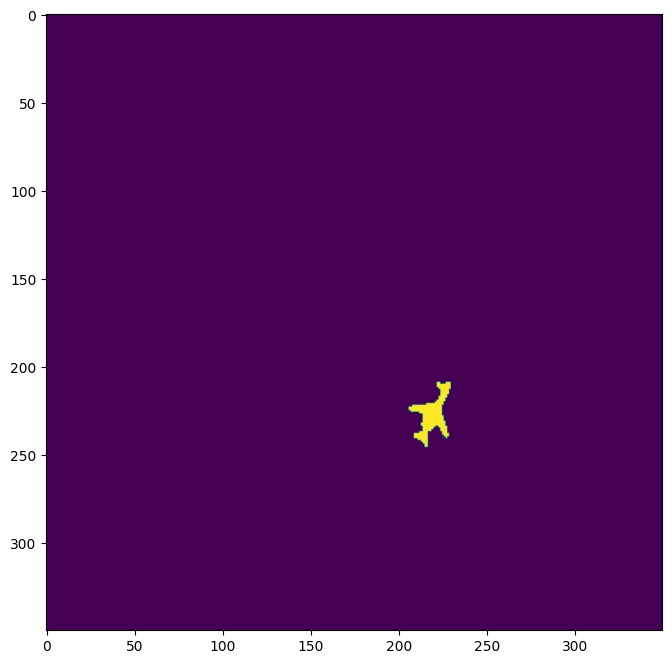

In [21]:
def overlap_masks(masks):
    """Overlap masks and return one mask"""

    masks = masks.numpy()
    mask_overlapped = np.zeros_like(masks[0])

    for mask in masks:
        mask_overlapped = np.logical_or((mask > 0.5).astype(np.float32), mask_overlapped)

    return mask_overlapped

plt.figure(figsize=(8,8))
plt.imshow(overlap_masks(mask_reshaped))

Define a custom PyTorch dataset class nqmed "Dataset" for object detection tasks, employing SAM model.  The dataset provides image data, bounding boxes, class labels, masks, and other target information for training or evaluation of object detection models.

In [22]:
import torch
from torch.utils.data import Dataset

class Dataset(torch.utils.data.Dataset):

    def __init__(self, grouped_df, df, image_folder, processor, model, device):

        self.df = df
        self.image_folder = image_folder
        self.grouped_df = grouped_df
        self.processor = processor
        self.model = model
        self.device = device

        formatted_array = []
        for num in df["imageid"].unique():
            num_str = str(num)
            if len(num_str) == 1:
                formatted_array.append("00" + num_str)
            elif len(num_str) == 2:
                formatted_array.append("0" + num_str)
            else:
                formatted_array.append(num_str)
        self.image_ids = formatted_array
        self.classes = [_, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

        self.masks = []
        for idx in range(len(self.image_ids)):
            image_name = self.image_ids[idx]
            image_path = os.path.join(self.image_folder, image_name + '.jpg')
            image = Image.open(image_path)
            resized_image = image.resize((350, 350))
            resized_array = np.array(resized_image).astype(np.uint8)

            input_boxes = [self.grouped_df["resized_bbox"][idx]]


            # SAM to find mask
            inputs = self.processor(resized_array,input_boxes=input_boxes ,return_tensors="pt").to(self.device)
            image_embeddings = self.model.get_image_embeddings(inputs["pixel_values"])
            inputs.pop("pixel_values", None)
            inputs.update({"image_embeddings": image_embeddings})
            with torch.no_grad():
                outputs = self.model(**inputs, multimask_output=False)
            masks = self.processor.image_processor.post_process_masks(outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())
            masks = torch.as_tensor(np.array(list(map(np.array, masks)), dtype=np.uint8))
            masks = masks.squeeze(dim=0).squeeze(dim=1)
            self.masks.append(masks)

    def __getitem__(self, idx):
        image_name = self.image_ids[idx]
        image_path = os.path.join(self.image_folder, image_name + '.jpg')
        image = Image.open(image_path)
        image_id=idx
        # Resize image
        resized_image = image.resize((350, 350))
        image = np.array(resized_image).astype(np.uint8)
        image_normalized = image / 255.0
        # Get classes
        labels = torch.as_tensor(self.grouped_df["classid"][idx], dtype=torch.int64)

        # Get boxes
        boxes = torch.as_tensor(self.grouped_df["resized_bbox"][idx], dtype=torch.float32)

        # Calculate the area
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

        # Get mask
        masks = self.masks[idx]

        # Suppose all instances are not crowd
        iscrowd = torch.zeros((boxes.shape[0],), dtype=torch.int64)

        # Create target
        target = {}
        target["iscrowd"] = iscrowd
        target['boxes'] = boxes
        target["labels"] = labels
        target["masks"] = masks
        target["area"] = area
        target["image_id"] = image_id


        return transforms.ToTensor()(image_normalized), target

    def __len__(self):
        return len(self.image_ids)

In [23]:
dataset1 = Dataset(grouped_df, df, image_folder, processor, model, device)

In [ ]:
# Usage

train_dataset = dataset1
test_dataset = dataset1
torch.manual_seed(1)
indices = torch.randperm(len(dataset1)).tolist()

test_split = 0.2
size = int(len(dataset1)*test_split)
dataset_train = torch.utils.data.Subset(train_dataset, indices[:-size])
dataset_test = torch.utils.data.Subset(test_dataset, indices[-size:])

data_loader_train = torch.utils.data.DataLoader(
    dataset_train, batch_size=4, shuffle=True, num_workers=8,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=4, shuffle=False, num_workers=8,
    collate_fn=utils.collate_fn)

In [ ]:
# Send train=True for training transforms and False for val/test transforms
def get_transform(train):

    if train:
        return A.Compose([
                            A.HorizontalFlip(p=0.5),
                     # ToTensorV2 converts image to pytorch tensor without div by 255
                            ToTensorV2(p=1.0)
                        ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})
    else:
        return A.Compose([
                            ToTensorV2(p=1.0)
                        ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

In [ ]:
dataset=Dataset(grouped_df,df,image_folder)#,transforms=get_transform(train=True))
img, data=dataset[0]

In [ ]:
print(f"Shape of image is {img.shape} \n the data set is {data}")

Shape of image is torch.Size([3, 350, 350]) 
 the data set is {'iscrowd': tensor([0]), 'boxes': tensor([[205., 207., 230., 248.]]), 'labels': tensor([1]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8), 'image_id': 0, 'area': tensor([1025.])}


In [ ]:
print('length of dataset :', len(dataset))

length of dataset : 650


## Augmentation ##

In [ ]:
"""formatted_array=[]
for num in df["imageid"].unique():
            num_str = str(num)
            if len(num_str) == 1:
                formatted_array.append("00" + num_str)
            elif len(num_str) == 2:
                formatted_array.append("0" + num_str)
            else:
                formatted_array.append(num_str)
def read_img(df,img_id,formatted_array,images_folder):
    image_name = formatted_array[img_id]
    img_path = os.path.join(image_folder,image_name+'.jpg')
    img = cv2.imread(str(img_path))
    return img
chosen_img = read_img(grouped_df,1,formatted_array,images_folder)
def read_bboxes(df,img_id):
    return df["resized_bbox"][img_id]
boxes = read_bboxes(grouped_df,1)
print(boxes)

def draw_rect(img, bboxes, color=(255, 0, 0)):
    if isinstance(img, torch.Tensor):
        img = img.detach().cpu().numpy().transpose(1, 2, 0)
    img_copy = img.copy()
    for bbox in bboxes:
        bbox = np.array(bbox).astype(int)
        pt1, pt2 = (bbox[0], bbox[1]), (bbox[2], bbox[3])
        img_copy = cv2.rectangle(img_copy, pt1, pt2, color)
    return img_copy

img_resized = cv2.resize(chosen_img, (350, 350))
draw = draw_rect(img_resized,boxes)
print(draw.shape)

def plot_multiple_img(img_matrix_list, title_list, ncols, nrows=3, main_title=""):
    fig, myaxes = plt.subplots(figsize=(20, 15), nrows=nrows, ncols=ncols, squeeze=False)
    fig.suptitle(main_title, fontsize = 30)
    fig.subplots_adjust(wspace=0.3)
    fig.subplots_adjust(hspace=0.3)
    for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):

        myaxes[i // ncols][i % ncols].imshow(img)
        myaxes[i // ncols][i % ncols].set_title(title, fontsize=15)
        myaxes[i // ncols][i % ncols].grid(False)
        myaxes[i // ncols][i % ncols].set_xticks([])
        myaxes[i // ncols][i % ncols].set_yticks([])

    plt.show()"""

'formatted_array=[]\nfor num in df["imageid"].unique():\n            num_str = str(num)\n            if len(num_str) == 1:\n                formatted_array.append("00" + num_str)\n            elif len(num_str) == 2:\n                formatted_array.append("0" + num_str)\n            else:\n                formatted_array.append(num_str)\ndef read_img(df,img_id,formatted_array,images_folder):\n    image_name = formatted_array[img_id]\n    img_path = os.path.join(image_folder,image_name+\'.jpg\')\n    img = cv2.imread(str(img_path))\n    return img\nchosen_img = read_img(grouped_df,1,formatted_array,images_folder)\ndef read_bboxes(df,img_id):\n    return df["resized_bbox"][img_id]\nboxes = read_bboxes(grouped_df,1)\nprint(boxes)\n\ndef draw_rect(img, bboxes, color=(255, 0, 0)):\n    if isinstance(img, torch.Tensor):\n        img = img.detach().cpu().numpy().transpose(1, 2, 0)\n    img_copy = img.copy()\n    for bbox in bboxes:\n        bbox = np.array(bbox).astype(int)\n        pt1, pt2 

In [ ]:
"""bbox_params = {'format': 'pascal_voc', 'label_fields': ['labels']}
albumentation_list = [
    A.Compose([A.HorizontalFlip(p=0.5), ToTensorV2(p=1.0)], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})
]

titles_list = ["Original",
               "HorizontalFlip"
               # Add other titles as needed
              ]
img_matrix_list = [draw_rect(chosen_img, boxes)]

for aug_type in albumentation_list:
    anno = aug_type(image=chosen_img, bboxes=boxes, labels=np.ones(len(boxes)))
    img = draw_rect(anno['image'], anno['bboxes'])
    img_matrix_list.append(img)

plot_multiple_img(img_matrix_list,
                  titles_list,
                  ncols=3,
                  main_title="Different Types of Augmentations")"""


'bbox_params = {\'format\': \'pascal_voc\', \'label_fields\': [\'labels\']}\nalbumentation_list = [\n    A.Compose([A.HorizontalFlip(p=0.5), ToTensorV2(p=1.0)], bbox_params={\'format\': \'pascal_voc\', \'label_fields\': [\'labels\']})\n]\n\ntitles_list = ["Original",\n               "HorizontalFlip"\n               # Add other titles as needed\n              ]\nimg_matrix_list = [draw_rect(chosen_img, boxes)]\n\nfor aug_type in albumentation_list:\n    anno = aug_type(image=chosen_img, bboxes=boxes, labels=np.ones(len(boxes)))\n    img = draw_rect(anno[\'image\'], anno[\'bboxes\'])\n    img_matrix_list.append(img)\n\nplot_multiple_img(img_matrix_list,\n                  titles_list,\n                  ncols=3,\n                  main_title="Different Types of Augmentations")'

Train

Split the Train dataset into 20% Test and 80% Train

In [ ]:
train_dataset = Dataset(grouped_df,df,image_folder,transforms=get_transform(train=True))
test_dataset = Dataset(grouped_df,df,image_folder,transforms=get_transform(train=False))

In [ ]:
torch.manual_seed(1)
indices = torch.randperm(len(dataset)).tolist()


test_split = 0.2
tsize = int(len(dataset)*test_split)
dataset = torch.utils.data.Subset(train_dataset, indices[-2:])
dataset_test = torch.utils.data.Subset(test_dataset, indices[-2:])

data_loader_train = torch.utils.data.DataLoader(
    dataset, batch_size=10, shuffle=True, num_workers=4,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=10, shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)

In [ ]:
print(data_loader_train)

## Step 4: Modeling

Initialize Mask R-CNN Model

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

num_classes = 11

model_ft = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
in_features = model_ft.roi_heads.box_predictor.cls_score.in_features
model_ft.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
in_features_mask = model_ft.roi_heads.mask_predictor.conv5_mask.in_channels
hidden_layer = 256

model_ft.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask, hidden_layer, num_classes)
model_ft.to(device)

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:00<00:00, 197MB/s]


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [ ]:
device

device(type='cuda')

In [ ]:
size_data_train = len(dataset)
size_data_test = len(dataset_test)
print(f"Size of the train dataset {size_data_train} \nSize of the test dataset {size_data_test}")

Size of the train dataset 2 
Size of the test dataset 2


In [ ]:
dataset[0]

(tensor([[[0.4627, 0.5216, 0.5569,  ..., 0.3373, 0.4000, 0.4118],
          [0.4706, 0.5176, 0.5294,  ..., 0.3647, 0.5333, 0.6078],
          [0.4941, 0.5569, 0.5059,  ..., 0.4980, 0.5529, 0.5725],
          ...,
          [0.3294, 0.3412, 0.2824,  ..., 0.6275, 0.6392, 0.6353],
          [0.3373, 0.3529, 0.2196,  ..., 0.6157, 0.6471, 0.6667],
          [0.3412, 0.3333, 0.2431,  ..., 0.6196, 0.6275, 0.5804]],
 
         [[0.4392, 0.5137, 0.5647,  ..., 0.3451, 0.4039, 0.4157],
          [0.4471, 0.5059, 0.5373,  ..., 0.3804, 0.5490, 0.6235],
          [0.4745, 0.5490, 0.5098,  ..., 0.5255, 0.5804, 0.6000],
          ...,
          [0.2902, 0.3098, 0.2588,  ..., 0.6392, 0.6392, 0.6392],
          [0.2980, 0.3176, 0.1961,  ..., 0.6275, 0.6510, 0.6706],
          [0.3020, 0.2980, 0.2196,  ..., 0.6353, 0.6392, 0.5922]],
 
         [[0.4157, 0.4902, 0.5373,  ..., 0.3608, 0.4196, 0.4314],
          [0.4235, 0.4824, 0.5098,  ..., 0.3882, 0.5569, 0.6314],
          [0.4471, 0.5216, 0.4863,  ...,

Optimizer and Learning Rate Scheduler Setup for Model Training

In [ ]:
params = [p for p in model_ft.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.0005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=5,
                                               gamma=0.1)

In [ ]:
import torch.multiprocessing as mp

if __name__ == "__main__":
    mp.set_start_method('spawn')
    num_epochs = 10
    for epoch in range(num_epochs):
        train_one_epoch(model_ft, optimizer, data_loader_train, device, epoch, print_freq=100)
        lr_scheduler.step()
        evaluate(model, data_loader_test, device=device)